# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [173]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [174]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:** будет в пдф файле с решением 1-ой задачи

---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [175]:
# Определение модели
class TwoLayerNN(nn.Module):
    def __init__(self):
        super(TwoLayerNN, self).__init__()
        self.layer_1 = nn.Sequential(
            nn.Linear(in_features=1, out_features=2),  # кол-во нейронов во входном слое 1, в выходном 2
            nn.Sigmoid()      # Функция активации: Sigmoid
        )
        self.layer_2 = nn.Linear(in_features=2, out_features=1)  # Выходной слой: 1 нейрон (без функции активации)

    def forward(self, x):  # чтобы знать в какой очередностью применять слои при обучении
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x



Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))

y = np.squeeze(X*X)  # используем квадрат, используем squeeze чтобы сделать у 1 мерным

# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

assert y.shape == (sample_size,)


Обучите нейросеть на этих данных. Используйте код с занятия.

In [178]:
import torch.optim as optim

In [179]:
# Гиперпараметры
learning_rate = 0.05
epochs = 10000

In [180]:
# Преобразование в тензоры PyTorch
X_tensor_train = torch.tensor(X_train, dtype=torch.float32)
y_tensor_train = torch.tensor(y_train, dtype=torch.float32)

x_new_train = X_tensor_train.reshape(-1, 1)
y_new_train = y_tensor_train.reshape(-1, 1)

In [181]:
# Создание модели и оптимизатора
model = TwoLayerNN()
optim_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


In [182]:
# Обучение модели
for epoch in range(epochs):
    y_pred = model(x_new_train)  # Forward pass
    loss = optim_func(y_pred, y_new_train)

    loss.backward()  # Backward pass и оптимизация
    optimizer.step()
    optimizer.zero_grad()

    # Выводим информацию о процессе обучения каждые 100 эпох
    if (epoch + 1) % 100 == 0:
        print(f'Эпоха [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Эпоха [100/10000], Loss: 1.9322
Эпоха [200/10000], Loss: 1.8314
Эпоха [300/10000], Loss: 1.7000
Эпоха [400/10000], Loss: 1.5421
Эпоха [500/10000], Loss: 1.3226
Эпоха [600/10000], Loss: 1.0010
Эпоха [700/10000], Loss: 0.7063
Эпоха [800/10000], Loss: 0.5138
Эпоха [900/10000], Loss: 0.3934
Эпоха [1000/10000], Loss: 0.3143
Эпоха [1100/10000], Loss: 0.2598
Эпоха [1200/10000], Loss: 0.2208
Эпоха [1300/10000], Loss: 0.1921
Эпоха [1400/10000], Loss: 0.1703
Эпоха [1500/10000], Loss: 0.1535
Эпоха [1600/10000], Loss: 0.1402
Эпоха [1700/10000], Loss: 0.1296
Эпоха [1800/10000], Loss: 0.1209
Эпоха [1900/10000], Loss: 0.1136
Эпоха [2000/10000], Loss: 0.1076
Эпоха [2100/10000], Loss: 0.1024
Эпоха [2200/10000], Loss: 0.0980
Эпоха [2300/10000], Loss: 0.0941
Эпоха [2400/10000], Loss: 0.0906
Эпоха [2500/10000], Loss: 0.0876
Эпоха [2600/10000], Loss: 0.0848
Эпоха [2700/10000], Loss: 0.0824
Эпоха [2800/10000], Loss: 0.0801
Эпоха [2900/10000], Loss: 0.0780
Эпоха [3000/10000], Loss: 0.0761
Эпоха [3100/10000],

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

**Предоброботка данных для тестового набора**

In [183]:
X_tensor_test = torch.tensor(X_test, dtype=torch.float32)
y_tensor_test = torch.tensor(y_test, dtype=torch.float32)

x_new_test = X_tensor_test.reshape(-1, 1)
y_new_test = y_tensor_test.reshape(-1, 1)

In [184]:
# Проверка обученной модели на тестовой
with torch.no_grad():
    predicted = model(x_new_test).numpy()


In [185]:
# Рассчитываем MSE
mse_test = mean_squared_error(y_test, predicted)

print(f'Loss on Test Data: {mse_test}')

Loss on Test Data: 0.029437908041831967


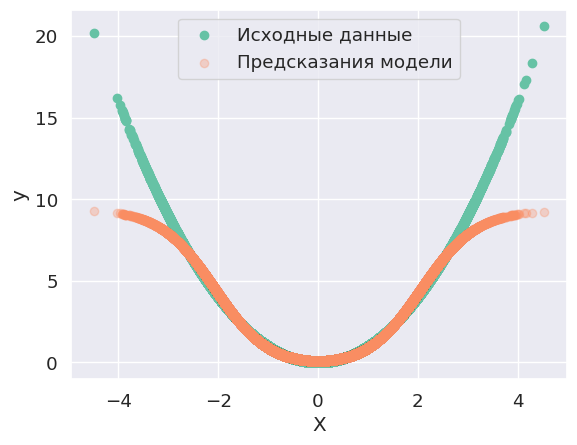

In [186]:
plt.scatter(X_test, y_test, label='Исходные данные')
plt.scatter(X_test, predicted, label='Предсказания модели', alpha=0.3)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


**Вывод:** Данная часть эксперимента показала, что нейронная сеть очень хорошо приближает данные. Однако так как у нас изначально они являются случайными величинами с нормальным распределением, можно на графике увидеть, что ближе к концам/"краям" функции нейронная сеть приближает хуже. Это может зависеть от количество эпох и так же из-за того что при нормальном распределении ближе к медиане распологаются большее количество данных, тем самым нейронной сети не хватает данных для обучения чтобы хорошо приблизить функцию около "краёв".

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

In [187]:
class TwoLayerNeuralNetwork:
    def __init__(self):       
        # Инициализация весов
        self.first_layer_weights = np.random.rand(2)
        self.second_layer_weights = np.random.rand(2)
        
        # Инициализация смещений
        self.first_layer_bias = np.random.rand((2))
        self.second_layer_bias = np.random.rand()
        
    @staticmethod    
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, x):
        self.first_layer_after_sigmoid = self.sigmoid((x.item() * self.first_layer_weights) + self.first_layer_bias)
        return np.sum((self.first_layer_after_sigmoid* self.second_layer_weights)) + self.second_layer_bias


    def predict(self, X):
        return np.array([self.forward(x) for x in X])
    
    def backward(self, X, y, lr):
        X = X.detach().numpy().flatten()
        y = y.detach().numpy().flatten()
        predict = self.predict(X)
        
        u = self.sigmoid(X[:, None] * self.first_layer_weights + self.first_layer_bias)
        delta = 2 / X.shape[0] * (predict - y)
    
        # d(MSE)/dw_{2h}
        dw2h = delta @ u
        # d(MSE)/d_{b2h}
        db2h = np.sum(delta)
    
        # d(MSE)/du_{h}
        duh = db2h * self.second_layer_weights

        # du/dw_{1h}
        du_dw_1h = X[:, None] * self.sigmoid_derivative(u)
        # du/db_{1h}
        du_db_1h = self.sigmoid_derivative(u)
        # d(MSE)/dw1h
        dw1h = np.sum(du_dw_1h * delta[:, np.newaxis], axis=0) * self.second_layer_weights
                            
        #d(MSE)/db1h
        db1h = np.sum(du_db_1h * delta[:, np.newaxis], axis=0) * self.second_layer_weights

        self.second_layer_bias -= db2h * lr
        self.first_layer_bias -= db1h * lr
        self.first_layer_weights -= dw1h * lr
        self.second_layer_weights -= dw2h * lr
     
        
    def train(self, X, y, epochs, batch_size, lr):
        for epoch in range(epochs):
            indices = np.random.permutation(len(X))
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for i in range(0, len(X_shuffled), batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                # Обратный проход и обновление весов
                self.backward(X_batch, y_batch, lr)

            # Вычисление и выводим информацию о процессе обучения каждые 100 эпох
            if (epoch + 1) % 100 == 0:
                loss = np.mean(np.square(y - self.forward(X)))
                print(f'Эпоха {epoch + 1}/{epochs}, Loss: {loss}')

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

In [188]:
# Создаем экземпляр нейронной сети
two_layer_my_network = TwoLayerNeuralNetwork()
linear_regression_model = LinearRegression()

# Обучение нейронной сети (кастомного класса)
two_layer_my_network.train(x_new_train, y_new_train, epochs=1, batch_size=64, lr=learning_rate)

# Обучение линейной регрессии
linear_regression_model.fit(x_new_train, y_new_train)

# Предсказания для тестовой выборки
y_pred_custom = two_layer_my_network.predict(x_new_test)
y_pred_linear = linear_regression_model.predict(x_new_test)



Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

In [189]:
# Оценка потерь на тестовой выборке
loss_custom = np.mean(np.square(y_test - y_pred_custom))
loss_linear = mean_squared_error(linear_regression_model.predict(x_new_test), y_new_test)

print(f'Loss for Custom Neural Network: {loss_custom}')
print(f'Loss for Linear Regression: {loss_linear}')

Loss for Custom Neural Network: 0.03466544883808688
Loss for Linear Regression: 1.9695556163787842


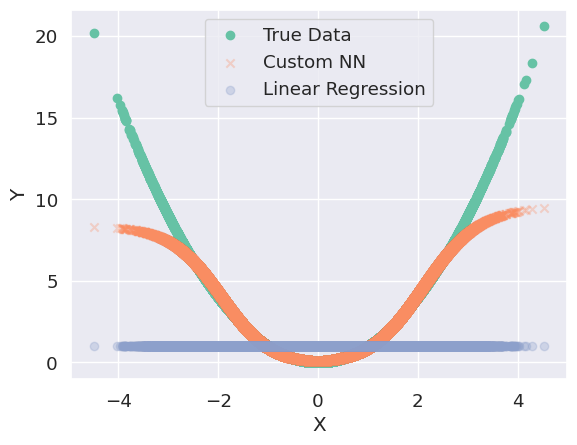

In [190]:
# Визуализация предсказаний
plt.scatter(x_new_test, y_test, label='True Data')
plt.scatter(x_new_test, y_pred_custom, label='Custom NN', marker='x', alpha=0.3)
plt.scatter(x_new_test, y_pred_linear, label='Linear Regression', marker='o', alpha=0.3)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Повторите вычисления для другой нелинейной функции $y(x)$.

In [191]:
new_sample_size = int(1e6)  # генерируем новые данные
new_X = sps.norm.rvs(size=(new_sample_size, 1))
# используем куб, используем squeeze чтобы сделать у 1 мерным
new_y = np.squeeze((new_X * new_X * new_X))

# Разделяем данные на тренировочную и тестовую выборки
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=19)

 **Предобработка данных**

In [192]:
# Преобразование в тензоры PyTorch
new_X_tensor_train = torch.tensor(new_X_train, dtype=torch.float32)
new_y_tensor_train = torch.tensor(new_y_train, dtype=torch.float32)

new_x_new_train = new_X_tensor_train.reshape(-1, 1)
new_y_new_train = new_y_tensor_train.reshape(-1, 1)

new_X_tensor_test = torch.tensor(new_X_test, dtype=torch.float32)
new_y_tensor_test = torch.tensor(new_y_test, dtype=torch.float32)

new_x_new_test = new_X_tensor_test.reshape(-1, 1)
new_y_new_test = new_y_tensor_test.reshape(-1, 1)

In [193]:
# Гиперпараметры
new_learning_rate = 0.05
new_epochs = 10000

In [194]:
# Создание модели и оптимизатора
new_model = TwoLayerNN()
new_optim_func = nn.MSELoss()
new_optimizer = optim.SGD(new_model.parameters(), lr=new_learning_rate)

**Обучение модели**

In [195]:
for epoch in range(new_epochs):
    new_y_pred = new_model(new_x_new_train)  # Forward pass
    new_loss = new_optim_func(new_y_pred, new_y_new_train)

    new_loss.backward()  # Backward pass и оптимизация
    new_optimizer.step()
    new_optimizer.zero_grad()

    # Выводим информацию о процессе обучения каждые 100 эпох
    if (epoch + 1) % 100 == 0:
        print(f'Эпоха [{epoch+1}/{new_epochs}], Loss: {new_loss.item():.4f}')

Эпоха [100/10000], Loss: 9.3796
Эпоха [200/10000], Loss: 8.1225
Эпоха [300/10000], Loss: 6.7830
Эпоха [400/10000], Loss: 5.2822
Эпоха [500/10000], Loss: 4.2956
Эпоха [600/10000], Loss: 3.6500
Эпоха [700/10000], Loss: 3.1998
Эпоха [800/10000], Loss: 2.8692
Эпоха [900/10000], Loss: 2.6160
Эпоха [1000/10000], Loss: 2.4153
Эпоха [1100/10000], Loss: 2.2514
Эпоха [1200/10000], Loss: 2.1143
Эпоха [1300/10000], Loss: 1.9972
Эпоха [1400/10000], Loss: 1.8955
Эпоха [1500/10000], Loss: 1.8060
Эпоха [1600/10000], Loss: 1.7262
Эпоха [1700/10000], Loss: 1.6545
Эпоха [1800/10000], Loss: 1.5896
Эпоха [1900/10000], Loss: 1.5304
Эпоха [2000/10000], Loss: 1.4763
Эпоха [2100/10000], Loss: 1.4264
Эпоха [2200/10000], Loss: 1.3804
Эпоха [2300/10000], Loss: 1.3377
Эпоха [2400/10000], Loss: 1.2980
Эпоха [2500/10000], Loss: 1.2610
Эпоха [2600/10000], Loss: 1.2264
Эпоха [2700/10000], Loss: 1.1940
Эпоха [2800/10000], Loss: 1.1635
Эпоха [2900/10000], Loss: 1.1348
Эпоха [3000/10000], Loss: 1.1078
Эпоха [3100/10000],

**Обучение кастомной через numpy и линейной регрессии**

In [196]:
# Создаем экземпляр нейронной сети
new_two_layer_my_network = TwoLayerNeuralNetwork()
new_linear_regression_model = LinearRegression()

# Обучение нейронной сети (кастомного класса)
new_two_layer_my_network.train(new_x_new_train, new_y_new_train, epochs=1, batch_size=64, lr=new_learning_rate)

# Обучение линейной регрессии
new_linear_regression_model.fit(new_x_new_train, new_y_new_train)

# Предсказания для тестовой выборки
new_y_pred_custom = new_two_layer_my_network.predict(new_x_new_test)
new_y_pred_linear = new_linear_regression_model.predict(new_x_new_test)

In [197]:
# Проверка обученной модели на тестовой
with torch.no_grad():
    new_predicted = new_model(new_x_new_test).numpy()

**Оценка на тестовой выборке**

In [198]:
new_mse_test = mean_squared_error(new_y_test, new_predicted)
new_loss_custom = np.mean(np.square(new_y_test - new_y_pred_custom))
new_loss_linear = mean_squared_error(new_y_pred_linear, new_y_new_test)

print(f'Loss on Test Data: {new_mse_test}')
print(f'Loss for Custom Neural Network: {new_loss_custom}')
print(f'Loss for Linear Regression: {new_loss_linear}')

Loss on Test Data: 0.4529729952139228
Loss for Custom Neural Network: 0.767386481181167
Loss for Linear Regression: 6.094091415405273


**Рисуем графики**

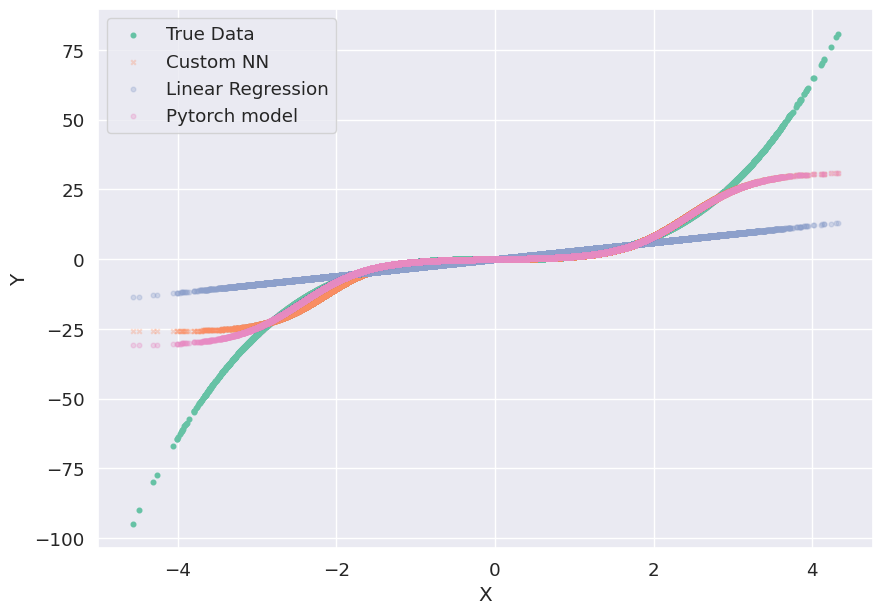

In [199]:
plt.figure(figsize=(10, 7))
plt.scatter(new_x_new_test, new_y_test, label='True Data', s=11)
plt.scatter(new_x_new_test, new_y_pred_custom, label='Custom NN', marker='x', alpha=0.3, s=11)
plt.scatter(new_x_new_test, new_y_pred_linear, label='Linear Regression', marker='o', alpha=0.3, s=11)
plt.scatter(new_x_new_test, new_predicted, label='Pytorch model', alpha=0.3, s=11)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Вывод:** В данной части эксперимента:
 1. Мы смогли написать свою примитивную нейронную сеть
 2. Поняли как работает метод обратного распространения
 3. Сравнили нейронную сеть из PyTorch, кастомную написанную с помощью numpy и линейную регрессию. Можно заметить, что линейная регрессия на нелинейных функциях приближает очень не точно, в отличии от нейронок. Из графика выше можно сделать вывод, что между нейронными сетьями реализованными с помощью PyTorch и numpy в качестве предсказании небольшая разница (первая возле "краёв" функции предсказывает чуть точнее чем numpy). Это может быть связано с тем, что библиотека PyTorch лучше справляется с нейронными сетями.

 Общий вывод: нейронные сети круто умеют предсказывать при достаточном обучении, но само обучение требует много времени и данных